# p17: Helmholtz Equation 

$$ 
U_{xx} + U_{yy} + k^{2}u = f, \qquad \mbox{on} \qquad [-1,1] \times [-1,1]
$$
A Minor modification of p16 to solve such problem for the particular choices as follows:

$$
k = 9, \qquad f(x,y) = \exp (-10[(y-1)^2 +(x-1/2)^2])
$$

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import cheb
from numpy import meshgrid,sin,dot,eye,kron,zeros,reshape,exp,linspace
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel,contour
from matplotlib import cm
from scipy.linalg import solve
from scipy.interpolate import interp2d

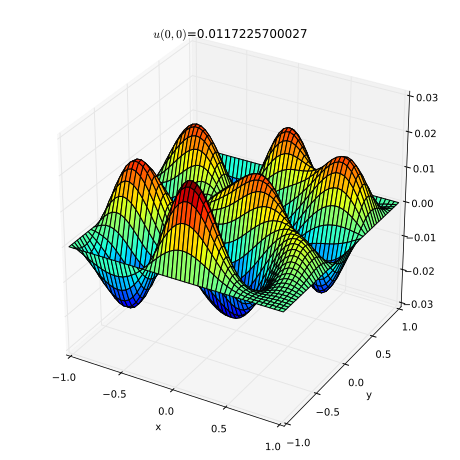

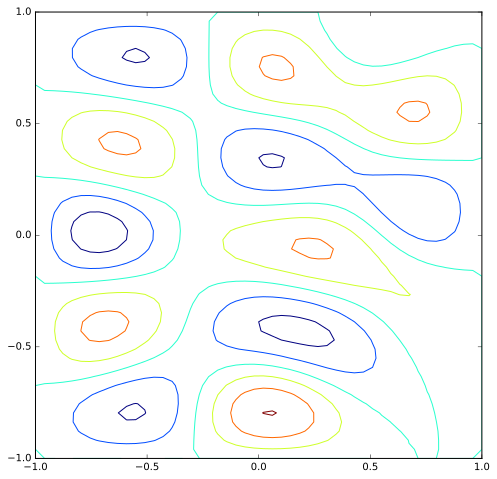

In [4]:
N = 24; D,x = cheb(N); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
f = exp(-10*((yy-1)**2 + (xx - 0.5)**2 ))
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
k = 9
L = kron(I,D2) + kron(D2,I) + k**2*eye((N-1)**2)
# Solve Lu=f
u = solve(L,f)
# Convert 1-d vectors to 2-d
uu = zeros((N+1,N+1)); uu[1:N,1:N] = reshape(u,(N-1,N-1))
[xx,yy] = meshgrid(x,y)
value = uu[N/2,N/2]

f = interp2d(x,y,uu,kind='cubic')
xxx = linspace(-1.0,1.0,50)
uuu = f(xxx,xxx)

fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
[X ,Y] = meshgrid(xxx,xxx)
ax.plot_surface(X,Y,uuu,rstride=1,cstride=1,cmap=cm.jet)
title("$u(0,0)$="+str(value))
xlabel("x"); ylabel("y");

figure(figsize = (8,8))
contour(X,Y,uuu);